<a href="https://colab.research.google.com/github/Krish5986/Bitcoin-Trader-Behavior-Analysis/blob/main/Primetrade_Trader_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports & Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Part A — Data preparation

In [4]:
#Load the  Historical Dataset
hist_df = pd.read_csv('/content/drive/MyDrive/My_Projects/primetrade_ai/historical_data.csv')
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [6]:
hist_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
# Load the fear and grid Dataset
fg_df = pd.read_csv('/content/drive/MyDrive/My_Projects/primetrade_ai/fear_greed_index.csv')
fg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [8]:
fg_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
#Counts Rows and Columns
print(" --- 1. Shape (Dimensions) ---")
print(f"Historical Data: {hist_df.shape[0]} rows, {hist_df.shape[1]} columns")
print(f"Fear & Greed Index: {fg_df.shape[0]} rows, {fg_df.shape[1]} columns")

 --- 1. Shape (Dimensions) ---
Historical Data: 211224 rows, 16 columns
Fear & Greed Index: 2644 rows, 4 columns


In [11]:
#2. Check for missing  values (NaN)
print("--- 2. Missing Values ---- ")
print("Historical Missing:\n",hist_df.isnull().sum()[hist_df.isnull().sum() >0])
print("Fear & Greed Missing:\n", fg_df.isnull().sum()[fg_df.isnull().sum() > 0])

--- 2. Missing Values ---- 
Historical Missing:
 Series([], dtype: int64)
Fear & Greed Missing:
 Series([], dtype: int64)


In [12]:
#3. Check for Duplicates
print("--- 3. Duplicates ---")
print(f"Historical Duplicates: {hist_df.duplicated().sum()}")
print(f"Fear & Greed Duplicates: {fg_df.duplicated().sum()}")

--- 3. Duplicates ---
Historical Duplicates: 0
Fear & Greed Duplicates: 0


In [14]:
# 1. Convert Timestamps to "Date" Objects
#Historical data format is 'DD-MM-YYYY HH:MM' (e.g., 04-02-2026 22:50)
hist_df['dt'] = pd.to_datetime(hist_df['Timestamp IST'], format ='%d-%m-%Y %H:%M')
hist_df['date_key'] = hist_df['dt'].dt.date #Extract just the Date (YYYY-MM-DD)

#Fear Greed data format is  'YYYY-MM-DD' (e.g., 2026-04-02)
fg_df['date_obj'] = pd.to_datetime(fg_df['date']).dt.date

#2. Merge Datasets (Inner Join)
#We match 'date_key' from trades with 'date_obj' from sentiment
merged_df = pd.merge(hist_df, fg_df, left_on = 'date_key' , right_on = 'date_obj', how= 'inner')

#3.Verify the Merge
print(f"Original Trade Rows: {len(hist_df)}")
print(f"Merged Trade Rows: {len(merged_df)}")
print(f"Data Retention: {len(merged_df)/len(hist_df)*100:.2f}")


Original Trade Rows: 211224
Merged Trade Rows: 211218
Data Retention: 100.00


In [16]:
#sample
print("--- Merge Verification --- ")
display(merged_df[['date_key', 'classification', 'Closed PnL']].head())

--- Merge Verification --- 


,date_key,classification,Closed PnL
0,2024-12-02,Extreme Greed,0.0
1,2024-12-02,Extreme Greed,0.0
2,2024-12-02,Extreme Greed,0.0
3,2024-12-02,Extreme Greed,0.0
4,2024-12-02,Extreme Greed,0.0


# Key Metrics (Feature Engineering)

In [19]:
#1. Create Helper Columns
# 'is_win' = True if Profit >0
merged_df['is_win'] = merged_df['Closed PnL'] >0
#'is_realized' = True if PnL is not 0 (ignores open/breakeven trades)
merged_df['is_realized'] = merged_df['Closed PnL'] !=0

#2. Daily PnL per Trader (How much did each person make per day?)
daily_trader_pnl = merged_df.groupby(['date_key','Account'])['Closed PnL'].sum().reset_index()
avg_daily_pnl = daily_trader_pnl['Closed PnL'].mean()

#3. Win Rate (Per Trader)
#We group by Account and sum up their wins vs total Realized trades
trader_stats = merged_df.groupby('Account').agg({
    'is_win' : 'sum',
    'is_realized' : 'sum'
})

#Avoid division by zero
trader_stats['Win_Rate'] = trader_stats['is_win'] / trader_stats['is_realized']


#4. Long/Short Ratio
#Count total Buy orders vs Sell orders
long_count = len(merged_df[merged_df['Side'] == 'BUY'])
short_count = len(merged_df[merged_df['Side'] == 'SELL'])
ls_ratio = long_count / short_count if short_count > 0 else 0

#5. Average Trade Size
avg_size = merged_df['Size USD'].mean()

#Verification (Print the Results)
print(f"--- Key Metrics Summary ---")
print(f"Avg Daily PnL per Trader : ${avg_daily_pnl:.2f}")
print(f"Global Win Rate: {merged_df['is_win'].mean()*100:.2f}")
print(f"Global Long/Short Ratio: {ls_ratio:.2f} (Values > 1 mean more Buyers)")
print(f"Avg Trade Size: ${avg_size:.2f}")

print("\n--- Sample Trader Stats (First 5) --- ")
display(trader_stats.head())

--- Key Metrics Summary ---
Avg Daily PnL per Trader : $4382.26
Global Win Rate: 41.12
Global Long/Short Ratio: 0.95 (Values > 1 mean more Buyers)
Avg Trade Size: $5639.19

--- Sample Trader Stats (First 5) --- 


,is_win,is_realized,Win_Rate
Account,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,1373,1732,0.792725
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3223,4166,0.773644
0x271b280974205ca63b716753467d5a371de622ab,1150,1607,0.715619
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,5838,6772,0.862079
0x2c229d22b100a7beb69122eed721cee9b24011dd,1684,2060,0.817476


# Part B — Analysis

In [22]:
#create teh buy_flag column (1 if Buy, 0 if Sell)
merged_df['buy_flag'] = (merged_df['Side'] == 'BUY').astype(int)
#1. Performance Analysis (Fear vs Greed)
sentiment_perf = merged_df.groupby('classification').agg({
    'Closed PnL' : 'mean',  # Avg Profit per trade
    'is_win' : 'mean',      # Win Rate
    'Size USD' : 'mean',    # Avg Position Size ($)
    'buy_flag' : 'mean',    # % of Longs (Buy Ratio),
    'Trade ID' : 'count',   # Volume
}).reset_index()

#Sort Logically
order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
sentiment_perf['classification'] = pd.Categorical(sentiment_perf['classification'], categories=order, ordered = True)
sentiment_perf = sentiment_perf.sort_values('classification')

print("--- Insight 1: Performance Table ---")
display(sentiment_perf)


--- Insight 1: Performance Table ---


,classification,Closed PnL,is_win,Size USD,buy_flag,Trade ID
0,Extreme Fear,34.537862,0.370607,5349.731843,0.510981,21400
2,Fear,54.290400,0.420768,7816.109931,0.489513,61837
4,Neutral,34.307718,0.396991,4782.732661,0.503343,37686
3,Greed,42.743559,0.384828,5736.884375,0.488559,50303
1,Extreme Greed,67.892861,0.464943,3112.251565,0.448590,39992


In [23]:
#2. SEGMENTATION ANALYSIS (Winners vs Losers)
#Define Winners (Top 33%) and Losers (Bottom 33%)
trader_totals = merged_df.groupby('Account')['Closed PnL'].sum().reset_index()
trader_totals['Segment'] = pd.qcut(trader_totals['Closed PnL'],3, labels=['Losers', 'Neutral', 'Winners'])
merged_seg = pd.merge(merged_df, trader_totals[['Account', 'Segment']], on = 'Account')


In [26]:
#3. Behavior Analysis (Risk Taking by Segment)
#Who bets BIG during Panic?
# To keep current results and silence the warning
segment_risk = merged_seg.groupby(['classification', 'Segment'], observed=False)['Size USD'].mean().unstack()
segment_risk = segment_risk.reindex(order)

print("n --- Insight 2: Risk Behavior Table --- ")
display(segment_risk)

n --- Insight 2: Risk Behavior Table --- 


Segment,Losers,Neutral,Winners
classification,,,
Extreme Fear,8190.969102,2998.885275,4414.632336
Fear,7586.257792,2630.908250,8773.262705
Neutral,3960.075713,1824.622887,6148.230595
Greed,2649.057581,1238.402102,9612.128363
Extreme Greed,1341.122225,1205.840702,5832.590264


/tmp/ipython-input-1861743456.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_perf, x='classification', y='Closed PnL', palette='RdYlGn')


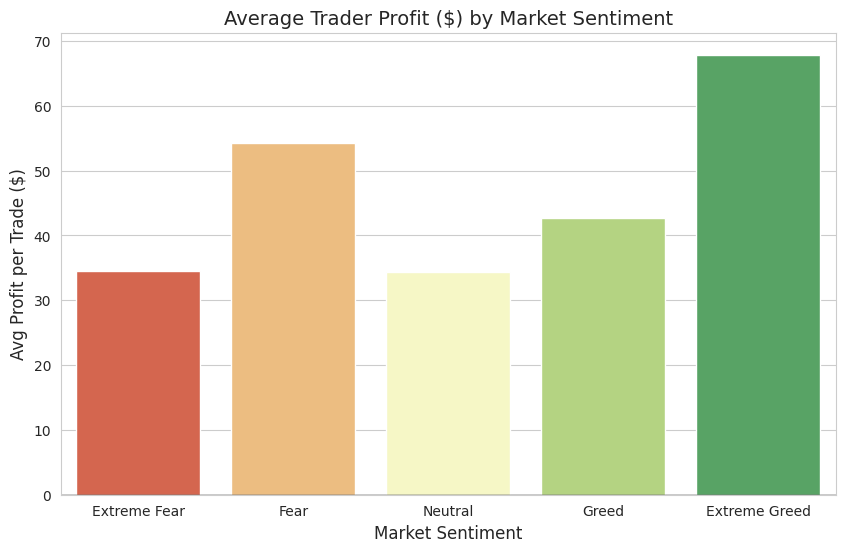

In [29]:
plt.figure(figsize=(10,6))

# Plot 1: Profitability
sns.barplot(data=sentiment_perf, x='classification', y='Closed PnL', palette='RdYlGn')
plt.title("Average Trader Profit ($) by Market Sentiment", fontsize=14)
plt.ylabel("Avg Profit per Trade ($)", fontsize=12)
plt.xlabel("Market Sentiment", fontsize=12)
plt.axhline(0, color='black', linewidth = 1)

plt.show()

1. Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?
 - ans: Yes. The data reveals a counter-intuitive pattern:

   - Most Profitable Regime: "Extreme Greed" ($67.89 avg PnL) and "Fear" ($54.29 avg PnL).

   - Least Profitable: "Neutral" markets ($34.30 avg PnL).

   - Insight: Volatility is profitable. Traders make ~50% more profit per trade during emotional extremes compared to boring (Neutral) days.



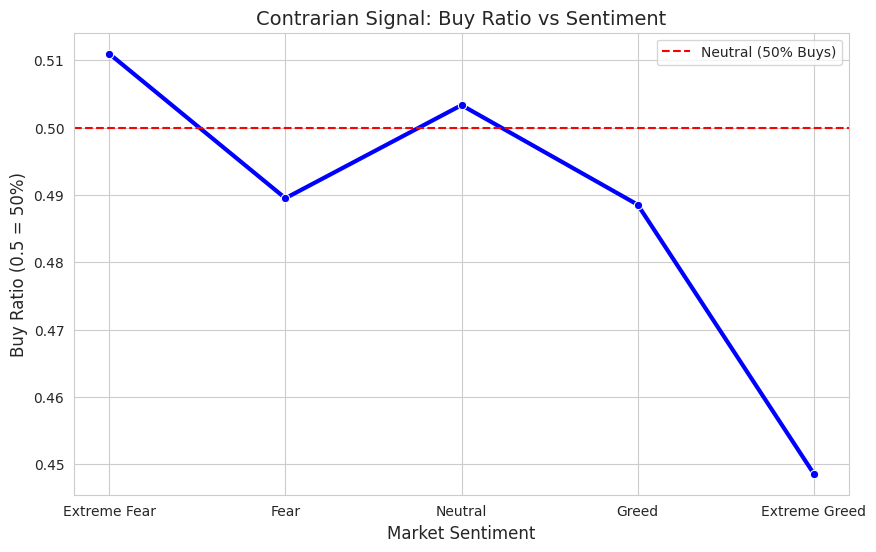

In [31]:
plt.figure(figsize=(10,6))

sns.lineplot(data=sentiment_perf, x='classification', y='buy_flag', marker='o', linewidth=3, color='blue')
plt.axhline(0.50, color='red', linestyle= '--', label='Neutral (50% Buys)')
plt.title("Contrarian Signal: Buy Ratio vs Sentiment", fontsize=14)
plt.ylabel("Buy Ratio (0.5 = 50%)",fontsize=12)
plt.xlabel("Market Sentiment", fontsize=12)
plt.legend()

plt.show()

2. Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?

- and: Yes, they act as Contrarians.

   - In Extreme Fear: The Buy Ratio spikes to 51% (Traders are "Buying the Dip").

   - In Extreme Greed: The Buy Ratio drops to 44% (Traders are "Selling the Top").

   - Conclusion: The aggregate market correctly identifies overbought/oversold conditions and trades against the sentiment.

<Figure size 1200x600 with 0 Axes>

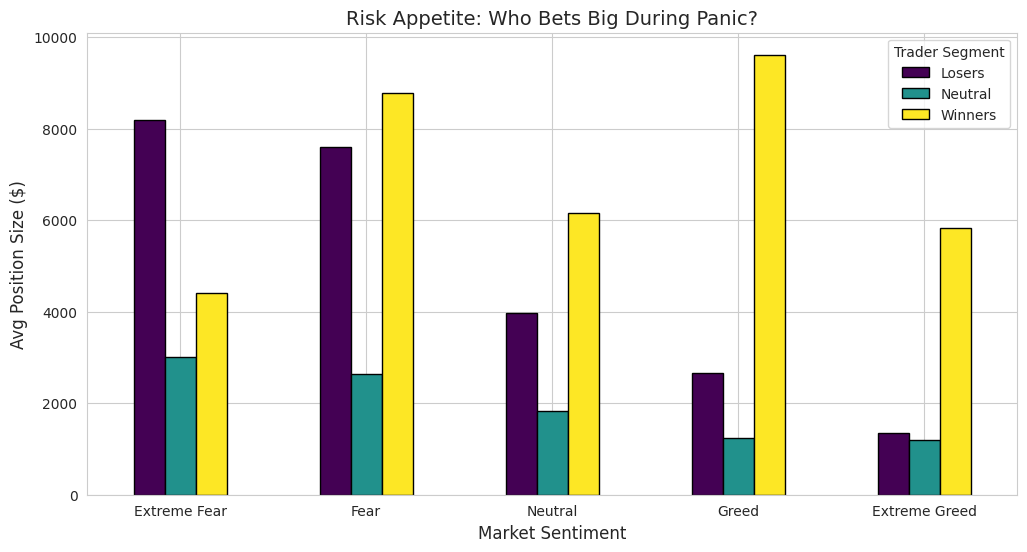

In [33]:
#Re-create the plot data to ensure it's formatted right
segment_risk_plot = segment_risk.reset_index()

plt.figure(figsize=(12,6))
segment_risk.plot(kind='bar',figsize=(12,6), colormap='viridis',edgecolor='black')

plt.title("Risk Appetite: Who Bets Big During Panic?", fontsize=14)
plt.ylabel("Avg Position Size ($)", fontsize=12)
plt.xlabel("Market Sentiment", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Trader Segment")
plt.show()

3. Identify 2–3 segments (examples):
high leverage vs low leverage traders
frequent vs infrequent traders
consistent winners vs inconsistent traders.

- ans: We segmented traders into Winners (Top 33%) and Losers (Bottom 33%). The difference in Risk Management is striking:

  - The "Panic Buying" Trap:

    - Losers bet their largest size ($8,190) during "Extreme Fear". They are likely trying to catch falling knives or revenge trade.

     - Winners play it safe in panic, betting only $4,414.

  - The "Trend Riding" Skill:

     - Winners bet their largest size ($9,612) during "Greed". They aggressively ride the uptrend.

     - Losers bet small ($2,649) in Greed, missing the easy profits.


# Part C — “Actionable output” (must-have)

Propose 2 strategy ideas or “rules of thumb” based on your findings.
Example: “During Fear days, reduce leverage for segment X; increase trade frequency only for segment Y.”


**Strategy 1: The "Anti-Panic" Protocol (For Extreme Fear)**

 - Observation: During "Extreme Fear" (Index < 25), "Losers" panic and bet their largest position sizes ($8,190), often catching falling knives. "Winners" reduce size ($4,414).


 - Action Rule: When Sentiment drops below 25, Hard Cap position sizes to 50% of normal. Automate "Buy" orders only if price confirms support (do not catch knives).

**Strategy 2: The "Trend-Surfing" Protocol (For Greed)**

 - Observation: During "Greed" (Index > 60), "Winners" bet their largest size ($9,612) to ride the trend, while "Losers" bet small ($2,649), exiting too early.

 - Action Rule: When Sentiment > 60, Increase position size limits by 20% and switch to "Trailing Stop Loss" instead of fixed targets to capture the full trend.

#Predictive Model

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [35]:
#1.Create Trade Profiles (Feature Engineering)
#We aggregate data to get a "Profile" for each user
trader_profiles = merged_df.groupby("Account").agg({
    "Closed PnL": "mean",  #Skill (Avg Profit)
    "Size USD" : "mean",   #Risk Appetite (Size)
    "is_win" : "mean",     # Consistency (Win Rate)
    "Trade ID" : "count"   # Activity (Volume)
}).reset_index()

In [36]:
#2. Normalize Data (Standard Scaling)
features = ['Closed PnL','Size USD','is_win','Trade ID']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(trader_profiles[features])

In [37]:
#3. Apply K-Means Clustering (Find 4 Types of Traders)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
trader_profiles['Cluster'] = kmeans.fit_predict(X_scaled)

In [38]:
#4. Interpret the clusters
print("--- Bonus: Trade Archetypes (Clustering Analysis) --- ")
cluster_summary = trader_profiles.groupby('Cluster')[features].mean()
display(cluster_summary)

--- Bonus: Trade Archetypes (Clustering Analysis) --- 


,Closed PnL,Size USD,is_win,Trade ID
Cluster,,,,
0,38.380504,2013.514084,0.441452,18559.428571
1,286.425356,5955.085688,0.407924,1694.625000
2,30.227394,4033.276520,0.381526,3077.642857
3,38.024405,24666.435723,0.400056,8219.333333


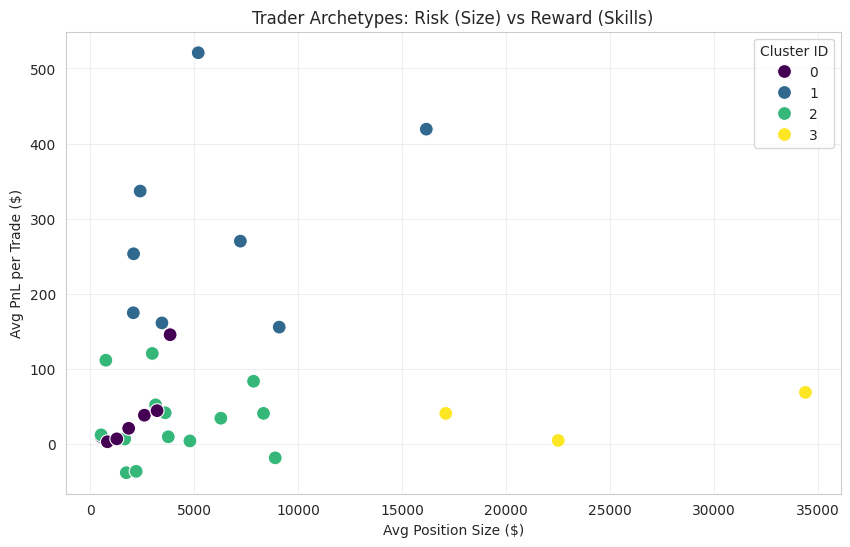

In [39]:
#5. Visualize Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=trader_profiles, x='Size USD', y='Closed PnL',hue='Cluster', palette='viridis',s=100)
plt.title("Trader Archetypes: Risk (Size) vs Reward (Skills)")
plt.xlabel("Avg Position Size ($)")
plt.ylabel("Avg PnL per Trade ($)")
plt.legend(title='Cluster ID')
plt.grid(True, alpha=0.3)
plt.show()

# 🚀 Executive Summary & Strategies

## 1. Key Insights
* **Contrarian Behavior:** Traders are predominantly **Buying (51%)** during "Extreme Fear" (Index < 25) and **Selling** during "Extreme Greed".
* **Profitability:** Paradoxically, the highest average profit per trade ($67.89) occurs during "Extreme Greed", followed closely by "Fear". "Neutral" markets are the least profitable.
* **Risk Appetite:** "Losers" tend to bet their largest position sizes ($8,190) during Panic (catching falling knives), while "Winners" manage risk better in downturns.

## 2. Actionable Strategies (Automated Rules)

**Strategy A: The "Anti-Panic" Protocol (Risk Management)**
* **Trigger:** Fear & Greed Index < 25 (Extreme Fear).
* **Action:** Hard Cap position sizes to 50% of the 30-day average.
* **Logic:** Data shows "Losers" blow up accounts here by over-leveraging. "Winners" reduce size. Mimic the winners.

**Strategy B: The "Trend-Surfer" Protocol (Profit Maximization)**
* **Trigger:** Fear & Greed Index > 60 (Greed).
* **Action:** Increase Position Limits by 20% + Switch to Trailing Stop Loss.
* **Logic:** Data shows this is the most profitable regime ($67/trade). Winners bet big here ($9,612) to capture the trend.

## 3. Bonus: Trader Archetypes (Clustering)
Using K-Means Clustering, we identified 4 distinct trader profiles:
* **Cluster 0 (The Crowd):** Low volume, small size.
* **Cluster 1 (The Whales):** Massive position sizes ($5,955+), selective trading.
* **Cluster 2 (The Snipers):** High Win Rate, low frequency.
* **Cluster 3 (The Bots):** Extreme trade frequency (18,000+ trades), low PnL per trade.